In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
TRAIN_DIR = '/kaggle/input/seeing-beyond-the-visible/Data/Data/Train/'
TEST_DIR = '/kaggle/input/seeing-beyond-the-visible/Data/Data/Test/'

In [3]:
train_df = pd.read_csv(os.path.join(TRAIN_DIR,'train_gt.csv'))
wavelength_df = pd.read_csv(os.path.join(TRAIN_DIR, 'wavelengths.csv'))

In [4]:
train_df.head()

,sample_index,P,K,Mg,pH
0,1328,81.1,283.0,171.0,6.8
1,1712,46.6,176.0,213.0,6.7
2,707,88.9,210.0,178.0,6.7
3,679,66.5,285.0,211.0,7.1
4,755,79.2,300.0,181.0,6.6


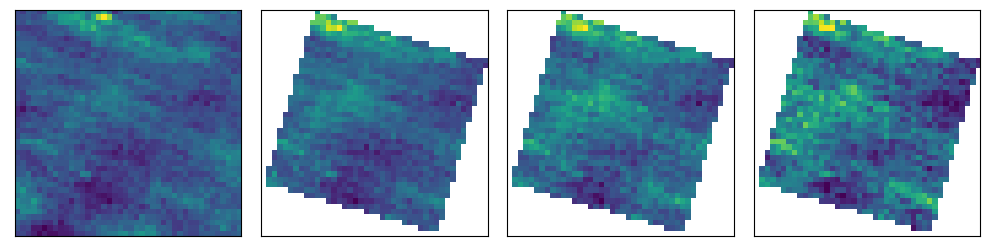

In [5]:
fig,axs = plt.subplots(1,4, figsize=(10,20))
band_id = 25
wavelength = wavelength_df.loc[band_id-1]

#pick random image patch for visualization
random_sample_path = os.path.join(TRAIN_DIR,'TrainData/1001.npz')
with np.load(random_sample_path) as npz:
    arr = np.ma.MaskedArray(**npz)

#plot 4 different bands
axs[0].imshow(arr[band_id,:,:].data)
axs[0].set_xticks([])
axs[0].set_yticks([])
for i in range(1,4):
    axs[i].imshow(arr[band_id+(40*i+3),:,:])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.tight_layout()
plt.show()

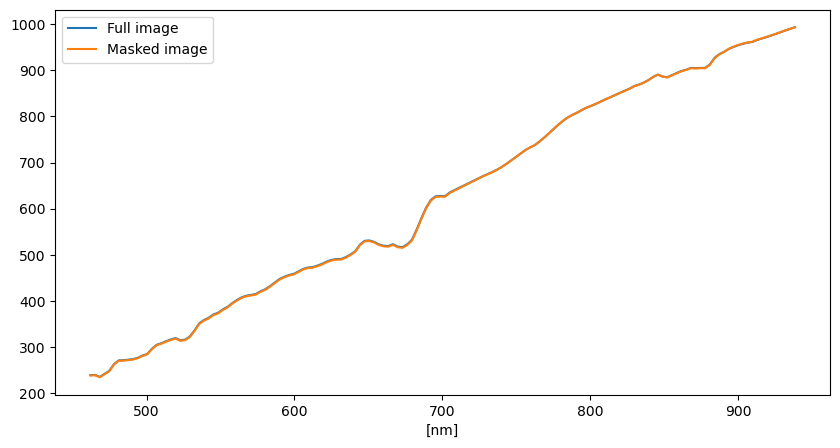

In [6]:
fig = plt.figure(figsize=(10, 5))

masked_scene_mean_spectral_reflectance = [arr[i,:,:].mean() for i in range(arr.shape[0])]
full_scene_mean_spectral_reflectance = [arr[i,:,:].data.mean() for i in range(arr.shape[0])]

plt.plot(wavelength_df['wavelength'], full_scene_mean_spectral_reflectance, label='Full image')
plt.plot(wavelength_df['wavelength'], masked_scene_mean_spectral_reflectance, label='Masked image')

plt.xlabel('[nm]')
plt.legend()
plt.show()

In [7]:
class SpectralCurveFiltering():
    def __init__(self, merge_function = np.mean):
        self.merge_function = merge_function
        
    def __call__(self, sample: np.ndarray):
        return self.merge_function(sample, axis=(1, 2))

In [8]:
from glob import glob

def load_data(directory: str):
    data = []
    filtering = SpectralCurveFiltering()
    all_files = np.array(
        sorted(
            glob(os.path.join(directory, "*.npz")),
            key=lambda x: int(os.path.basename(x).replace(".npz", "")),
        )
    )
    for file_name in all_files:
        with np.load(file_name) as npz:
            arr = np.ma.MaskedArray(**npz)
        arr = filtering(arr)
        data.append(arr)
    return np.array(data)

In [9]:
def load_gt(file_path: str):
    gt_file = pd.read_csv(file_path)
    gt_file = gt_file.sort_values(by=['sample_index'])
    labels = gt_file[["P", "K", "Mg", "pH"]].values
    return labels

In [10]:
X_train = load_data(os.path.join(TRAIN_DIR,'TrainData'))
y_train = load_gt(os.path.join(TRAIN_DIR,'train_gt.csv'))
X_test = load_data(os.path.join(TEST_DIR,'TestData'))
print(f"Train data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"y_Train shape: {y_train.shape}")

Train data shape: (1385, 150)
Test data shape: (347, 150)
y_Train shape: (1385, 4)


# Saperating Bands

In [11]:
gt_df = train_df.sort_values(by=['sample_index'])
gt_df

,sample_index,P,K,Mg,pH
680,0,45.1,188.0,179.0,7.2
1156,1,44.8,205.0,188.0,7.0
509,2,44.4,207.0,145.0,6.8
426,3,46.5,204.0,143.0,6.8
948,4,52.0,212.0,167.0,6.7
...,...,...,...,...,...
696,1727,40.8,133.0,132.0,6.2
1286,1728,42.7,192.0,126.0,6.5
909,1729,39.4,180.0,122.0,6.5
1070,1730,37.3,162.0,127.0,6.5


In [12]:
wavelength_df

,band_no,wavelength
0,1,462.08
1,2,465.27
2,3,468.47
3,4,471.67
4,5,474.86
...,...,...
145,146,925.58
146,147,928.78
147,148,931.98
148,149,935.17


In [13]:
band = list(wavelength_df.T.columns)
bands= []
for i in band:
    bands.append('Band_'+str(i+1))
    
bands

['Band_1',
 'Band_2',
 'Band_3',
 'Band_4',
 'Band_5',
 'Band_6',
 'Band_7',
 'Band_8',
 'Band_9',
 'Band_10',
 'Band_11',
 'Band_12',
 'Band_13',
 'Band_14',
 'Band_15',
 'Band_16',
 'Band_17',
 'Band_18',
 'Band_19',
 'Band_20',
 'Band_21',
 'Band_22',
 'Band_23',
 'Band_24',
 'Band_25',
 'Band_26',
 'Band_27',
 'Band_28',
 'Band_29',
 'Band_30',
 'Band_31',
 'Band_32',
 'Band_33',
 'Band_34',
 'Band_35',
 'Band_36',
 'Band_37',
 'Band_38',
 'Band_39',
 'Band_40',
 'Band_41',
 'Band_42',
 'Band_43',
 'Band_44',
 'Band_45',
 'Band_46',
 'Band_47',
 'Band_48',
 'Band_49',
 'Band_50',
 'Band_51',
 'Band_52',
 'Band_53',
 'Band_54',
 'Band_55',
 'Band_56',
 'Band_57',
 'Band_58',
 'Band_59',
 'Band_60',
 'Band_61',
 'Band_62',
 'Band_63',
 'Band_64',
 'Band_65',
 'Band_66',
 'Band_67',
 'Band_68',
 'Band_69',
 'Band_70',
 'Band_71',
 'Band_72',
 'Band_73',
 'Band_74',
 'Band_75',
 'Band_76',
 'Band_77',
 'Band_78',
 'Band_79',
 'Band_80',
 'Band_81',
 'Band_82',
 'Band_83',
 'Band_84',
 

In [14]:
X_train = pd.DataFrame(X_train,columns=bands)
X_test = pd.DataFrame(X_test, columns=bands)
print(X_train.head())
print(X_train.shape)

       Band_1      Band_2      Band_3      Band_4      Band_5      Band_6  \
0  450.139241  450.822785  446.810127  454.455696  466.075949  487.316456   
1  553.833333  552.025641  545.397436  553.897436  563.628205  586.025641   
2  422.551282  419.525641  414.871795  423.500000  433.717949  453.358974   
3  609.870130  610.558442  604.584416  615.090909  628.675325  655.025974   
4  403.910256  401.974359  396.294872  403.756410  412.397436  432.051282   

       Band_7      Band_8      Band_9     Band_10  ...     Band_141  \
0  499.620253  501.696203  505.164557  509.797468  ...  1508.405063   
1  597.179487  595.923077  595.589744  597.166667  ...  2670.948718   
2  463.910256  464.666667  466.307692  468.064103  ...  1170.512821   
3  670.623377  674.740260  681.519481  689.272727  ...  1766.987013   
4  443.653846  445.423077  448.487179  452.487179  ...  1448.256410   

      Band_142     Band_143     Band_144     Band_145     Band_146  \
0  1512.240506  1515.949367  1520.012658

In [15]:
data = X_train.interpolate()
test_data = X_test.interpolate()
data

,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6,Band_7,Band_8,Band_9,Band_10,...,Band_141,Band_142,Band_143,Band_144,Band_145,Band_146,Band_147,Band_148,Band_149,Band_150
0,450.139241,450.822785,446.810127,454.455696,466.075949,487.316456,499.620253,501.696203,505.164557,509.797468,...,1508.405063,1512.240506,1515.949367,1520.012658,1524.164557,1528.734177,1533.493671,1538.012658,1542.354430,1546.924051
1,553.833333,552.025641,545.397436,553.897436,563.628205,586.025641,597.179487,595.923077,595.589744,597.166667,...,2670.948718,2673.051282,2674.025641,2675.230769,2676.705128,2678.384615,2680.243590,2681.769231,2682.833333,2684.025641
2,422.551282,419.525641,414.871795,423.500000,433.717949,453.358974,463.910256,464.666667,466.307692,468.064103,...,1170.512821,1173.025641,1174.358974,1175.756410,1177.307692,1179.051282,1181.166667,1183.089744,1184.692308,1186.500000
3,609.870130,610.558442,604.584416,615.090909,628.675325,655.025974,670.623377,674.740260,681.519481,689.272727,...,1766.987013,1771.558442,1774.935065,1778.610390,1782.519481,1786.649351,1791.272727,1795.467532,1799.766234,1804.090909
4,403.910256,401.974359,396.294872,403.756410,412.397436,432.051282,443.653846,445.423077,448.487179,452.487179,...,1448.256410,1449.974359,1451.166667,1452.384615,1453.679487,1455.282051,1457.320513,1458.935897,1460.410256,1462.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,373.513188,373.586403,369.137108,377.484766,387.306958,406.717372,418.343565,420.522283,424.615734,429.369941,...,1333.640291,1337.956571,1341.584357,1345.420191,1349.388813,1353.648477,1358.232151,1362.545020,1366.650750,1371.012051
1381,455.041371,456.446765,452.960353,461.952545,474.761712,496.873859,510.869600,513.818901,518.241229,524.070675,...,1625.341209,1629.818191,1633.708781,1637.911985,1642.265768,1646.927601,1651.944737,1656.634354,1661.209491,1666.028392
1382,382.116393,383.250952,379.975851,387.935603,399.352225,419.198085,431.859350,434.600783,438.566844,443.808768,...,1399.429457,1403.307408,1406.691831,1410.308278,1414.064179,1418.103992,1422.473512,1426.563146,1430.476776,1434.632220
1383,357.004575,357.761262,354.445917,362.647935,373.010558,392.266776,404.135031,406.682543,410.755279,415.489794,...,1331.037658,1335.728766,1339.839160,1344.185946,1348.669052,1353.438409,1358.540591,1363.367433,1367.977358,1372.843149


In [16]:
data.columns[:10].values

array(['Band_1', 'Band_2', 'Band_3', 'Band_4', 'Band_5', 'Band_6',
       'Band_7', 'Band_8', 'Band_9', 'Band_10'], dtype=object)

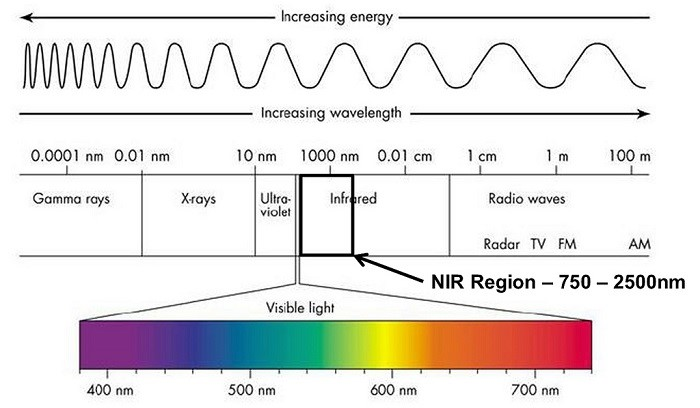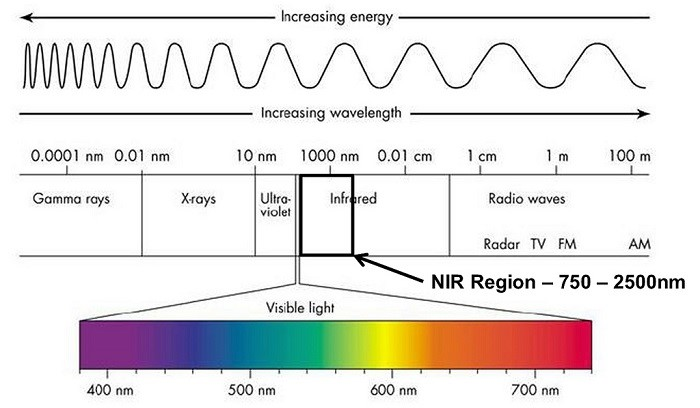

In [17]:
b1 = data[data.columns[:10]]    # Band 1 : Coastal
b2 = data[data.columns[11:32]]  # Band 2 : Blue
b3 = data[data.columns[33:49]]  # Band 3 : Green
b4 = data[data.columns[50:81]]  # Band 4 : Red 
b5 = data[data.columns[113:140]]# Badn 5 : NIR
b6 = data[data.columns[141:]]


test_b1 = test_data[test_data.columns[:10]]    # Band 1 : Coastal
test_b2 = test_data[test_data.columns[11:32]]  # Band 2 : Blue
test_b3 = test_data[test_data.columns[33:49]]  # Band 3 : Green
test_b4 = test_data[test_data.columns[50:81]]  # Band 4 : Red 
test_b5 = test_data[test_data.columns[113:140]]# Badn 5 : NIR
test_b6 = test_data[test_data.columns[141:]]

In [18]:
b1

,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6,Band_7,Band_8,Band_9,Band_10
0,450.139241,450.822785,446.810127,454.455696,466.075949,487.316456,499.620253,501.696203,505.164557,509.797468
1,553.833333,552.025641,545.397436,553.897436,563.628205,586.025641,597.179487,595.923077,595.589744,597.166667
2,422.551282,419.525641,414.871795,423.500000,433.717949,453.358974,463.910256,464.666667,466.307692,468.064103
3,609.870130,610.558442,604.584416,615.090909,628.675325,655.025974,670.623377,674.740260,681.519481,689.272727
4,403.910256,401.974359,396.294872,403.756410,412.397436,432.051282,443.653846,445.423077,448.487179,452.487179
...,...,...,...,...,...,...,...,...,...,...
1380,373.513188,373.586403,369.137108,377.484766,387.306958,406.717372,418.343565,420.522283,424.615734,429.369941
1381,455.041371,456.446765,452.960353,461.952545,474.761712,496.873859,510.869600,513.818901,518.241229,524.070675
1382,382.116393,383.250952,379.975851,387.935603,399.352225,419.198085,431.859350,434.600783,438.566844,443.808768
1383,357.004575,357.761262,354.445917,362.647935,373.010558,392.266776,404.135031,406.682543,410.755279,415.489794


In [19]:
dataset = [b1,b2,b3,b4,b5,b6]
final =[]
for i in dataset:
    final.append(i.mean(axis=1))
    
test_dataset = [test_b1,test_b2,test_b3,test_b4,test_b5,test_b6]
test_final =[]
for i in test_dataset:
    test_final.append(i.mean(axis=1))

In [20]:
np.array(final), np.array(final).shape

(array([[ 477.18987342,  574.06666667,  443.0474359 , ...,  410.06648537,
          383.41996715,  405.36644997],
        [ 650.56238698,  757.66300366,  581.5964591 , ...,  593.31052095,
          554.54540122,  578.08976904],
        [ 876.47863924,  920.48477564,  748.94230769, ...,  842.23568884,
          782.14197413,  813.92656947],
        [1064.23560637, 1148.21215881,  866.49710505, ...,  996.21529003,
          929.57427983,  970.28042517],
        [1491.0806376 , 2631.14007597, 1143.6377018 , ..., 1378.85928101,
         1312.49454264, 1340.00125581],
        [1529.09845288, 2678.47435897, 1179.43874644, ..., 1418.51348248,
         1353.84331821, 1373.66805467]]),
 (6, 1385))

In [21]:
final_arr = np.squeeze(np.array(final).T)
final_df = pd.DataFrame(final_arr,columns=["Coastal","Blue","Green","Red","NIR","Extra"])

test_final_arr = np.squeeze(np.array(test_final).T)
test_final_df = pd.DataFrame(test_final_arr,columns=["Coastal","Blue","Green","Red","NIR","Extra"])

In [22]:
final_df

,Coastal,Blue,Green,Red,NIR,Extra
0,477.189873,650.562387,876.478639,1064.235606,1491.080638,1529.098453
1,574.066667,757.663004,920.484776,1148.212159,2631.140076,2678.474359
2,443.047436,581.596459,748.942308,866.497105,1143.637702,1179.438746
3,643.996104,893.914657,1181.618506,1396.863008,1734.063492,1787.207792
4,424.043590,604.658120,839.893429,1027.135649,1441.305793,1455.700855
...,...,...,...,...,...,...
1380,398.059732,574.039011,815.391215,968.444425,1318.601932,1354.048709
1381,486.503701,688.735246,964.733472,1145.766549,1588.922895,1647.383256
1382,410.066485,593.310521,842.235689,996.215290,1378.859281,1418.513482
1383,383.419967,554.545401,782.141974,929.574280,1312.494543,1353.843318


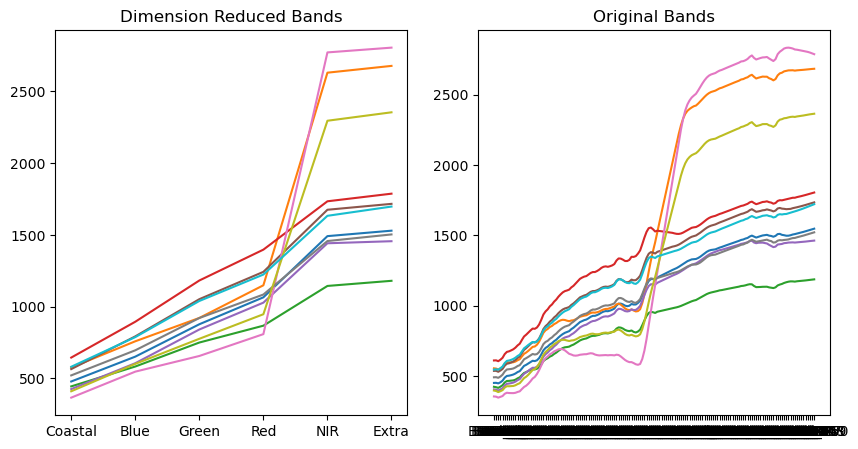

In [23]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.plot(final_df[:10].T);
ax1.set_title('Dimension Reduced Bands')
ax2.plot(data[:10].T);
ax2.set_title('Original Bands');

# Calculating indexing

In [73]:
index = pd.DataFrame(columns=["Simple ratio (SR)",
                               "Salinity index (SI)",
                               "Salinity index 1 (SI1)",
                               "Salinity index 2 (SI2)",
                               "Salinity index 3 (SI3)",
                               "Salinity index 4 (SI4)",
                               "Intensity index 1 (Int1)",
                               "Intensity index 2 (Int2)",
                               "Ratio vegetation index (RVI)",
                               "Normalized difference salinity index (NDSI)",
                               "Normalized difference vegetation index (NDVI)"])

test_index = pd.DataFrame(columns=["Simple ratio (SR)",
                               "Salinity index (SI)",
                               "Salinity index 1 (SI1)",
                               "Salinity index 2 (SI2)",
                               "Salinity index 3 (SI3)",
                               "Salinity index 4 (SI4)",
                               "Intensity index 1 (Int1)",
                               "Intensity index 2 (Int2)",
                               "Ratio vegetation index (RVI)",
                               "Normalized difference salinity index (NDSI)",
                               "Normalized difference vegetation index (NDVI)"])

In [74]:
B = final_df['Blue']
G = final_df['Green']
R = final_df['Red']
NIR = final_df['NIR']

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8592485/

In [75]:
index['Simple ratio (SR)']= ( R - NIR )/( G + NIR )
index['Salinity index (SI)']= (R*G)/B
index['Salinity index 1 (SI1)']= np.sqrt(G*R)
index['Salinity index 2 (SI2)']= np.sqrt(R*NIR)
index['Salinity index 3 (SI3)']= np.sqrt((G**2 + R**2 + NIR**2))
index['Salinity index 4 (SI4)']= np.sqrt((G**2 + R**2))
index['Normalized difference salinity index (NDSI)']  = (R-NIR)/(R+NIR)
index['Normalized difference vegetation index (NDVI)']= (NIR-R)/(NIR+R)
index['Intensity index 1 (Int1)']=(G+R)/2
index['Intensity index 2 (Int2)']=(G+R+NIR)/2
index['Simple ratio (SR)']= (R - NIR) / (G+NIR)
index['Ratio vegetation index (RVI)'] = R/NIR

In [76]:
B = test_final_df['Blue']
G = test_final_df['Green']
R = test_final_df['Red']
NIR = test_final_df['NIR']

In [77]:
test_index['Simple ratio (SR)']= ( R - NIR )/( G + NIR )
test_index['Salinity index (SI)']= (R*G)/B
test_index['Salinity index 1 (SI1)']= np.sqrt(G*R)
test_index['Salinity index 2 (SI2)']= np.sqrt(R*NIR)
test_index['Salinity index 3 (SI3)']= np.sqrt((G**2 + R**2 + NIR**2))
test_index['Salinity index 4 (SI4)']= np.sqrt((G**2 + R**2))
test_index['Normalized difference salinity index (NDSI)']  = (R-NIR)/(R+NIR)
test_index['Normalized difference vegetation index (NDVI)']= (NIR-R)/(NIR+R)
test_index['Intensity index 1 (Int1)']=(G+R)/2
test_index['Intensity index 2 (Int2)']=(G+R+NIR)/2
test_index['Simple ratio (SR)']= (R - NIR) / (G+NIR)
test_index['Ratio vegetation index (RVI)'] = R/NIR

In [78]:
index.describe()

,Simple ratio (SR),Salinity index (SI),Salinity index 1 (SI1),Salinity index 2 (SI2),Salinity index 3 (SI3),Salinity index 4 (SI4),Intensity index 1 (Int1),Intensity index 2 (Int2),Ratio vegetation index (RVI),Normalized difference salinity index (NDSI),Normalized difference vegetation index (NDVI)
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,-0.306742,1171.197698,806.018932,1244.335501,2179.017289,1153.525843,810.862381,1712.713228,0.574962,-0.287650,0.287650
std,0.167219,284.559549,202.222046,391.772752,874.070997,287.543532,202.751368,562.495598,0.176797,0.159069,0.159069
min,-0.707529,550.605802,388.873841,557.048339,905.475255,556.714167,391.272409,748.327997,0.197363,-0.670337,0.086036
25%,-0.430872,964.812566,652.623236,884.798551,1431.877835,931.462233,655.640158,1201.120491,0.421878,-0.406590,0.170213
50%,-0.237532,1160.671990,804.947973,1187.870941,1928.957897,1160.198885,813.267331,1621.526583,0.637584,-0.221312,0.221312
75%,-0.182810,1326.336833,909.480624,1550.794265,2799.111673,1302.933394,914.496432,2150.636940,0.709091,-0.170213,0.406590
max,-0.091783,2269.305811,1726.161396,2208.840830,5036.777415,2451.364365,1729.772643,3294.636936,0.841560,-0.086036,0.670337


In [79]:
index_arr =np.array(index)
test_index_arr =np.array(test_index)
index_arr.shape

(1385, 11)

In [80]:
# Place the DataFrames side by side
horizontal_stack = pd.concat([final_df, index], axis=1)
test_horizontal_stack = pd.concat([test_final_df, test_index], axis=1)

In [81]:
horizontal_stack

,Coastal,Blue,Green,Red,NIR,Extra,Simple ratio (SR),Salinity index (SI),Salinity index 1 (SI1),Salinity index 2 (SI2),Salinity index 3 (SI3),Salinity index 4 (SI4),Intensity index 1 (Int1),Intensity index 2 (Int2),Ratio vegetation index (RVI),Normalized difference salinity index (NDSI),Normalized difference vegetation index (NDVI)
0,477.189873,650.562387,876.478639,1064.235606,1491.080638,1529.098453,-0.180289,1433.805266,965.805248,1259.706754,2030.796321,1378.699471,970.357123,1715.897442,0.713734,-0.167042,0.167042
1,574.066667,757.663004,920.484776,1148.212159,2631.140076,2678.474359,-0.417535,1394.962940,1028.062163,1738.133202,3014.727431,1471.626102,1034.348467,2349.918505,0.436393,-0.392376,0.392376
2,443.047436,581.596459,748.942308,866.497105,1143.637702,1179.438746,-0.146435,1115.818935,805.578265,995.469114,1618.529890,1145.308611,807.719706,1379.538557,0.757667,-0.137872,0.137872
3,643.996104,893.914657,1181.618506,1396.863008,1734.063492,1787.207792,-0.115651,1846.439331,1284.740900,1556.357653,2520.798435,1829.603388,1289.240757,2156.272503,0.805543,-0.107700,0.107700
4,424.043590,604.658120,839.893429,1027.135649,1441.305793,1455.700855,-0.181558,1426.730999,928.808098,1216.723700,1959.028076,1326.811447,933.514539,1654.167436,0.712642,-0.167786,0.167786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,398.059732,574.039011,815.391215,968.444425,1318.601932,1354.048709,-0.164086,1375.622668,888.628762,1130.041012,1827.965670,1265.996618,891.917820,1551.218786,0.734448,-0.153105,0.153105
1381,486.503701,688.735246,964.733472,1145.766549,1588.922895,1647.383256,-0.173538,1604.911825,1051.360709,1349.271916,2183.613433,1497.828981,1055.250011,1849.711458,0.721096,-0.162050,0.162050
1382,410.066485,593.310521,842.235689,996.215290,1378.859281,1418.513482,-0.172277,1414.180335,915.995672,1172.024189,1898.172483,1304.532813,919.225489,1608.655130,0.722492,-0.161108,0.161108
1383,383.419967,554.545401,782.141974,929.574280,1312.494543,1353.843318,-0.182810,1311.090238,852.677584,1104.563791,1788.434045,1214.847484,855.858127,1512.105398,0.708250,-0.170789,0.170789


In [82]:
# normalize the dataframe
X_mean = np.mean(horizontal_stack, axis=0)
X_std = np.std(horizontal_stack, axis=0)
X_mean, X_std

(Coastal                                           400.508304
 Blue                                              555.963545
 Green                                             725.533553
 Red                                               896.191210
 NIR                                              1803.701694
 Extra                                            1848.619092
 Simple ratio (SR)                                  -0.306742
 Salinity index (SI)                              1171.197698
 Salinity index 1 (SI1)                            806.018932
 Salinity index 2 (SI2)                           1244.335501
 Salinity index 3 (SI3)                           2179.017289
 Salinity index 4 (SI4)                           1153.525843
 Intensity index 1 (Int1)                          810.862381
 Intensity index 2 (Int2)                         1712.713228
 Ratio vegetation index (RVI)                        0.574962
 Normalized difference salinity index (NDSI)        -0.287650
 Normali

In [83]:
y_train = gt_df.drop(columns=['sample_index'])

In [84]:
y_train

,P,K,Mg,pH
680,45.1,188.0,179.0,7.2
1156,44.8,205.0,188.0,7.0
509,44.4,207.0,145.0,6.8
426,46.5,204.0,143.0,6.8
948,52.0,212.0,167.0,6.7
...,...,...,...,...
696,40.8,133.0,132.0,6.2
1286,42.7,192.0,126.0,6.5
909,39.4,180.0,122.0,6.5
1070,37.3,162.0,127.0,6.5


In [85]:
y_mean = np.mean(y_train, axis=0)
y_std = np.std(y_train, axis=0)
y_mean, y_std

(P      70.496751
 K     229.593574
 Mg    159.943610
 pH      6.779913
 dtype: float64,
 P     30.413595
 K     62.828714
 Mg    39.703957
 pH     0.260296
 dtype: float64)

In [86]:
horizontal_stack = (horizontal_stack - X_mean) / X_std
y_train = (y_train - y_mean) / y_std

In [87]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd

class CustomDataset(Dataset):
    def __init__(self, data_df, label_df):
        self.data = data_df
        self.labels = label_df

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        data = self.data.iloc[idx, :]
        label = self.labels.iloc[idx, :]
        return torch.tensor(data.values), torch.tensor(label.values)

In [88]:
# create an instance of your custom dataset
dataset = CustomDataset(horizontal_stack, y_train)

In [89]:
# create a data loader that batches the data and labels
train_dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [90]:
from torch import nn
class SBV_model(nn.Module):
    def __init__(self, inFeatures, outFeatures):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=inFeatures, out_features=100)
        self.layer_2 = nn.Linear(in_features=100, out_features=100)
        self.layer_3 = nn.Linear(in_features=100, out_features=outFeatures)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [91]:
model = SBV_model(len(horizontal_stack.columns), len(y_train.columns))

In [92]:
# Fit the model
torch.manual_seed(42)
epochs = 100

In [93]:
# Setup loss function and optimizer
loss_fn = nn.MSELoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [94]:
from sklearn.metrics import mean_squared_error

lr = 0.001
epochs = 500

# Create training and testing loop
for epoch in range(epochs):
#     print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.type(torch.float), y.type(torch.float)
        model.train() 
        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()
    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    if epoch%50==0:
        train_loss /= len(train_dataloader)
        print(f"Epoch {epoch} --> \nTrain loss: {train_loss:.5f}")

Epoch 0 --> 
Train loss: 0.99445
Epoch 50 --> 
Train loss: 0.98587
Epoch 100 --> 
Train loss: 0.95122
Epoch 150 --> 
Train loss: 0.94522
Epoch 200 --> 
Train loss: 0.93502
Epoch 250 --> 
Train loss: 0.93772
Epoch 300 --> 
Train loss: 0.92814
Epoch 350 --> 
Train loss: 0.92766
Epoch 400 --> 
Train loss: 0.93604
Epoch 450 --> 
Train loss: 0.92217


In [95]:
test_horizontal_stack = (test_horizontal_stack - X_mean) / X_std
X_test = torch.tensor(test_horizontal_stack.values, dtype=torch.float)
X_test

tensor([[ 1.0174,  1.1358,  1.0056,  ..., -0.5186, -0.3817,  0.3817],
        [ 0.8324,  0.8255,  0.4710,  ..., -1.0114, -0.9106,  0.9106],
        [ 1.2647,  1.1381,  1.0897,  ...,  0.6113,  0.6245, -0.6245],
        ...,
        [-1.3111, -1.4512, -1.4493,  ...,  0.3263,  0.3939, -0.3939],
        [ 0.1282,  0.2952,  0.6918,  ...,  0.7791,  0.7538, -0.7538],
        [-0.4051, -0.2449,  0.0918,  ...,  0.7509,  0.7324, -0.7324]])

In [96]:
X_test.shape

torch.Size([347, 17])

In [97]:
model.eval()
with torch.inference_mode():
    predictions = model(X_test).squeeze()
# # unnormalize the dataframe
# predictions = (predictions * y_std) + y_mean

In [98]:
import numpy as np
submission = pd.DataFrame(data = predictions.numpy(), columns=["P", "K", "Mg", "pH"])

# unnormalize the dataframe
submission = (submission * y_std) + y_mean

submission['sample_index'] = [i.split('.')[0] for i in sorted(os.listdir(os.path.join(TEST_DIR,'TestData')),key=lambda x: int(x.split('.')[0]))]
submission = submission[['sample_index','P','K','Mg','pH']]
submission.to_csv("submission.csv", index=False)
submission

,sample_index,P,K,Mg,pH
0,15,66.345268,229.909596,169.316837,6.879253
1,23,64.941772,217.388443,158.335870,7.049193
2,29,69.263183,222.428674,169.827934,6.918400
3,30,72.390870,217.624565,159.444625,6.841879
4,32,71.833894,235.539087,163.816345,6.826393
...,...,...,...,...,...
342,1713,87.768052,219.865121,144.587733,6.730512
343,1716,85.829376,222.275959,144.851979,6.740863
344,1719,79.653554,225.548524,146.141752,6.784401
345,1725,58.087642,218.649068,157.480221,6.671685
